In [19]:
import pandas as pd
import numpy as np
import iLearnFunctions as ilf
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import seaborn as sns
plt.style.use('seaborn-whitegrid')

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, silhouette_samples

import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.multivariate.manova import MANOVA
from statsmodels.stats.weightstats import ttest_ind
import scipy.stats as stats 

pd.options.display.max_columns = 4000

Code Supplement
===

This notebook is a copy of the analyses used within the paper 'Comparing usage in and between primary and secondary school for a blended TEL portal'. Within the repo are the datasets and supplemental images for the paper as well.


Student Analyses
---

In [3]:
iLearnTable = pd.read_csv('clustable.csv')
iLearnTable['Total Time in Completed Learning Activities'] = pd.to_timedelta(iLearnTable['Total Time in Completed Learning Activities'])
iLearnTable['Average Time in Completed Learning Activities'] = pd.to_timedelta(iLearnTable['Average Time in Completed Learning Activities'])
iLearnTable['Total Time in Completed Learning Tracks'] = pd.to_timedelta(iLearnTable['Total Time in Completed Learning Tracks'])
iLearnTable['Average Time in Completed Learning Tracks'] = pd.to_timedelta(iLearnTable['Average Time in Completed Learning Tracks'])
iLearnTable.drop(iLearnTable[iLearnTable.id == '1c24c4cf-8c2b-426c-a004-a20504c4cced'].index, inplace = True) #Teacher test account
iLearnTable.reset_index(drop = True, inplace = True)

iLearnTable

,id,school_id,Number of Started Assigned Learning Activities,Number of Completed Assigned Learning Activities,Ratio of Completed Learning Activities to Assigned Learning Activities,Total Time in Completed Learning Activities,Average Time in Completed Learning Activities,Number of Exercise Activities,Number of Engagement Activities,Number of Comunication Activities,Number of Video Activities,Number of Game Activities,Number of Free Learning Activities,Number of Unique Free Learning Activities,Number of Started Learning Tracks,Number of Completed Learning Tracks,Total Time in Completed Learning Tracks,Average Time in Completed Learning Tracks,Number of Language Learning Tracks Started,Number of STEM Learning Tracks Started,Number of Music Learning Tracks Started,Number of Religion Learning Tracks Started,Number of Problems,Average Difficulty Rating,Average Fun Rating
0,2b02b3cc-961f-45d4-87b9-c2fbc1d25339,4,48,45,0.523256,62 days 21:55:56.719778,1 days 09:33:14.593772844,30,13,1,4,0,0,0,6,4,46 days 20:27:11.021000,11 days 17:06:47.755250,6,0,0,0,1,NaN,3.628571
1,91e01e0e-ad9a-4a41-a271-4f865b007a80,4,9,8,0.222222,0 days 01:22:43.723870,0 days 00:10:20.465483750,2,6,1,0,0,0,0,4,3,0 days 00:54:38.236000,0 days 00:18:12.745333333,4,0,0,0,0,NaN,3.333333
2,287d9f81-b411-4858-8838-ed57fdbd6f92,4,9,8,0.222222,0 days 01:17:50.034121,0 days 00:09:43.754265125,2,6,1,0,0,0,0,4,3,0 days 00:46:33.058000,0 days 00:15:31.019333333,4,0,0,0,0,NaN,NaN
3,5eb57b9b-269d-44d5-94bc-001cae0ceff3,4,16,15,0.416667,0 days 01:19:11.952382,0 days 00:05:16.796825466,8,7,1,0,0,0,0,4,2,0 days 00:34:54.130000,0 days 00:17:27.065000,4,0,0,0,0,NaN,4.000000
4,1f820731-d07e-456e-8c0d-8a92ad0bb805,4,7,5,0.138889,0 days 00:32:41.413571,0 days 00:06:32.282714200,1,5,1,0,0,0,0,4,2,0 days 00:33:32.897000,0 days 00:16:46.448500,4,0,0,0,0,NaN,4.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
798,f0c26c6d-eca0-4716-b574-5048ef7630c7,33,10,9,0.750000,0 days 00:20:19.807388,0 days 00:02:15.534154222,7,1,0,2,0,0,0,1,0,NaT,NaT,0,0,0,0,0,2.5,3.125000
799,af068a83-2fac-4686-9486-9a8814846edf,33,4,2,0.142857,0 days 00:01:01.049652,0 days 00:00:30.524826,2,0,0,1,1,0,0,2,0,NaT,NaT,0,1,0,0,0,3.0,3.000000
800,82244471-9bb2-425e-b33a-8397c6335928,33,11,10,0.833333,0 days 00:57:53.082643,0 days 00:05:47.308264300,4,3,0,4,0,0,0,1,0,NaT,NaT,0,0,0,0,0,NaN,4.500000
801,a8f902fd-44ca-455c-9e2f-90bdafd13e7b,33,5,5,0.416667,0 days 01:01:24.321501,0 days 00:12:16.864300200,3,1,0,1,0,0,0,1,0,NaT,NaT,0,0,0,0,0,NaN,3.250000


In [4]:
iLearnTable.describe()

,school_id,Number of Started Assigned Learning Activities,Number of Completed Assigned Learning Activities,Ratio of Completed Learning Activities to Assigned Learning Activities,Total Time in Completed Learning Activities,Average Time in Completed Learning Activities,Number of Exercise Activities,Number of Engagement Activities,Number of Comunication Activities,Number of Video Activities,Number of Game Activities,Number of Free Learning Activities,Number of Unique Free Learning Activities,Number of Started Learning Tracks,Number of Completed Learning Tracks,Total Time in Completed Learning Tracks,Average Time in Completed Learning Tracks,Number of Language Learning Tracks Started,Number of STEM Learning Tracks Started,Number of Music Learning Tracks Started,Number of Religion Learning Tracks Started,Number of Problems,Average Difficulty Rating,Average Fun Rating
count,803.000000,803.000000,803.000000,794.000000,775,775,803.000000,803.000000,803.000000,803.000000,803.000000,803.000000,803.000000,803.000000,803.000000,368,368,803.000000,803.000000,803.000000,803.000000,803.000000,397.000000,633.000000
mean,11.202989,16.418431,14.515567,0.602741,5 days 23:59:49.856339851,0 days 12:39:43.554262598,9.937733,3.530511,1.189290,1.439601,0.321295,0.168120,0.123288,2.109589,0.747198,6 days 22:54:29.558910326,4 days 04:01:55.671115942,1.236613,0.550436,0.171856,0.001245,0.331258,2.377484,3.598872
std,5.646034,16.818431,16.432988,0.399622,15 days 22:06:25.664183270,1 days 09:51:11.015561888,11.040104,4.258189,2.140113,2.305210,0.498259,0.907371,0.636381,1.762860,1.032925,13 days 08:43:02.166447992,6 days 09:05:56.408729416,1.258905,1.035954,0.403049,0.035289,1.490571,0.770282,0.878239
min,4.000000,0.000000,0.000000,0.000000,0 days 00:00:00.164049,0 days 00:00:00.164049,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0 days 00:00:15.932000,0 days 00:00:15.932000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
25%,6.000000,5.000000,3.000000,0.300000,0 days 00:14:28.761402500,0 days 00:02:59.900762464,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0 days 00:49:55.213500,0 days 00:31:36.622500,0.000000,0.000000,0.000000,0.000000,0.000000,1.984127,3.000000
50%,11.000000,9.000000,7.000000,0.533333,0 days 01:56:31.411597,0 days 00:16:16.175565500,6.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,2 days 22:33:54.153500,1 days 21:53:55.958000,1.000000,0.000000,0.000000,0.000000,0.000000,2.291667,3.750000
75%,13.000000,26.000000,23.000000,0.800000,6 days 01:22:11.637582,0 days 08:35:53.818199587,14.000000,6.000000,2.000000,2.000000,1.000000,0.000000,0.000000,2.000000,1.000000,7 days 02:00:07.494500,5 days 03:45:32.265500,2.000000,1.000000,0.000000,0.000000,0.000000,3.000000,4.111111
max,33.000000,147.000000,145.000000,2.000000,282 days 13:45:17.277354,16 days 13:42:42.085908,101.000000,34.000000,24.000000,13.000000,2.000000,12.000000,8.000000,11.000000,6.000000,109 days 03:05:31.422000,38 days 01:08:13.700500,7.000000,6.000000,2.000000,1.000000,27.000000,5.000000,5.000000


In [5]:
#Time was exclued due to comments from teachers and unreliablity due to the architecture of i-Learn
clustable = iLearnTable.drop(columns = ['id', 'school_id', 'Total Time in Completed Learning Activities', 'Total Time in Completed Learning Tracks', 'Average Time in Completed Learning Activities', 'Average Time in Completed Learning Tracks'])

clustable['Ratio of Completed Learning Activities to Assigned Learning Activities'] = clustable['Ratio of Completed Learning Activities to Assigned Learning Activities'].fillna(0)

#Non responses filled with default value
clustable['Average Difficulty Rating'] = clustable['Average Difficulty Rating'].replace(0,3).fillna(3)
clustable['Average Fun Rating'] = clustable['Average Fun Rating'].replace(0,3).fillna(3)

clustable.describe()

,Number of Started Assigned Learning Activities,Number of Completed Assigned Learning Activities,Ratio of Completed Learning Activities to Assigned Learning Activities,Number of Exercise Activities,Number of Engagement Activities,Number of Comunication Activities,Number of Video Activities,Number of Game Activities,Number of Free Learning Activities,Number of Unique Free Learning Activities,Number of Started Learning Tracks,Number of Completed Learning Tracks,Number of Language Learning Tracks Started,Number of STEM Learning Tracks Started,Number of Music Learning Tracks Started,Number of Religion Learning Tracks Started,Number of Problems,Average Difficulty Rating,Average Fun Rating
count,803.000000,803.000000,803.000000,803.000000,803.000000,803.000000,803.000000,803.000000,803.000000,803.000000,803.000000,803.000000,803.000000,803.000000,803.000000,803.000000,803.000000,803.000000,803.000000
mean,16.418431,14.515567,0.595985,9.937733,3.530511,1.189290,1.439601,0.321295,0.168120,0.123288,2.109589,0.747198,1.236613,0.550436,0.171856,0.001245,0.331258,2.692231,3.472087
std,16.818431,16.432988,0.402414,11.040104,4.258189,2.140113,2.305210,0.498259,0.907371,0.636381,1.762860,1.032925,1.258905,1.035954,0.403049,0.035289,1.490571,0.624466,0.817153
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
25%,5.000000,3.000000,0.300000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.325758,3.000000
50%,9.000000,7.000000,0.524590,6.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,3.000000,3.466667
75%,26.000000,23.000000,0.800000,14.000000,6.000000,2.000000,2.000000,1.000000,0.000000,0.000000,2.000000,1.000000,2.000000,1.000000,0.000000,0.000000,0.000000,3.000000,4.000000
max,147.000000,145.000000,2.000000,101.000000,34.000000,24.000000,13.000000,2.000000,12.000000,8.000000,11.000000,6.000000,7.000000,6.000000,2.000000,1.000000,27.000000,5.000000,5.000000


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(


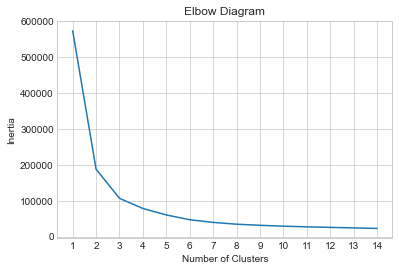

In [7]:
ilf.elbowsseDiagram(clustable, 15)

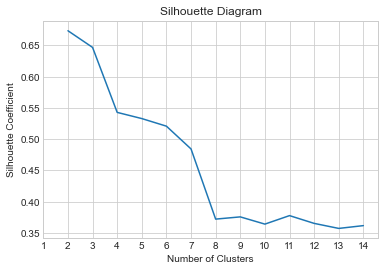

In [8]:
ilf.silDiagram(clustable, 15)

In [9]:
skmeans = KMeans(n_clusters = 2, random_state = 6)
skmeans.fit(clustable)
slabels = skmeans.labels_

iLearnTable['Standard Labels'] = pd.DataFrame(slabels)

In [11]:
iLearnTable[iLearnTable['Standard Labels'] == 0].describe()

,school_id,Number of Started Assigned Learning Activities,Number of Completed Assigned Learning Activities,Ratio of Completed Learning Activities to Assigned Learning Activities,Total Time in Completed Learning Activities,Average Time in Completed Learning Activities,Number of Exercise Activities,Number of Engagement Activities,Number of Comunication Activities,Number of Video Activities,Number of Game Activities,Number of Free Learning Activities,Number of Unique Free Learning Activities,Number of Started Learning Tracks,Number of Completed Learning Tracks,Total Time in Completed Learning Tracks,Average Time in Completed Learning Tracks,Number of Language Learning Tracks Started,Number of STEM Learning Tracks Started,Number of Music Learning Tracks Started,Number of Religion Learning Tracks Started,Number of Problems,Average Difficulty Rating,Average Fun Rating,Standard Labels
count,591.000000,591.000000,591.000000,582.000000,563,563,591.000000,591.000000,591.000000,591.000000,591.000000,591.000000,591.000000,591.000000,591.000000,200,200,591.000000,591.000000,591.000000,591.000000,591.000000,337.000000,423.000000,591.0
mean,11.842640,7.928934,6.346870,0.596467,3 days 00:00:26.504383742,0 days 13:38:21.429204072,4.617597,1.588832,0.815567,0.675127,0.231810,0.223350,0.162437,1.541455,0.480541,3 days 04:36:31.268455,2 days 20:00:05.139240416,0.869712,0.516074,0.060914,0.001692,0.241963,2.425048,3.559288,0.0
std,6.228742,5.779715,5.369072,0.451851,7 days 00:52:52.785663756,1 days 14:00:41.663866703,3.788828,1.935873,1.180991,1.539108,0.449561,1.048419,0.732312,1.167885,0.774078,6 days 08:56:43.064648464,6 days 06:31:26.243002178,0.955774,0.835238,0.246353,0.041135,1.387840,0.763267,0.879272,0.0
min,4.000000,0.000000,0.000000,0.000000,0 days 00:00:00.164049,0 days 00:00:00.164049,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0 days 00:00:15.932000,0 days 00:00:15.932000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.0
25%,6.000000,3.000000,2.000000,0.250000,0 days 00:06:27.368899,0 days 00:02:11.402191773,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0 days 00:31:08.126250,0 days 00:16:56.536000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,3.000000,0.0
50%,11.000000,7.000000,5.000000,0.500000,0 days 00:39:05.804687,0 days 00:06:06.681749500,4.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0 days 01:25:15.685500,0 days 00:50:12.253000,1.000000,0.000000,0.000000,0.000000,0.000000,2.400000,3.666667,0.0
75%,16.000000,11.000000,10.000000,0.928571,2 days 22:27:05.430391500,0 days 08:17:32.219453880,7.000000,3.000000,2.000000,1.000000,0.000000,0.000000,0.000000,2.000000,1.000000,3 days 01:02:09.947500,2 days 21:33:33.951000,1.000000,1.000000,0.000000,0.000000,0.000000,3.000000,4.000000,0.0
max,33.000000,31.000000,23.000000,2.000000,67 days 00:16:57.245491,16 days 13:42:42.085908,23.000000,9.000000,6.000000,9.000000,2.000000,12.000000,8.000000,9.000000,4.000000,38 days 00:59:19.554000,38 days 00:59:19.554000,4.000000,5.000000,2.000000,1.000000,27.000000,5.000000,5.000000,0.0


In [13]:
iLearnTable[iLearnTable['Standard Labels'] == 1].describe()

,school_id,Number of Started Assigned Learning Activities,Number of Completed Assigned Learning Activities,Ratio of Completed Learning Activities to Assigned Learning Activities,Total Time in Completed Learning Activities,Average Time in Completed Learning Activities,Number of Exercise Activities,Number of Engagement Activities,Number of Comunication Activities,Number of Video Activities,Number of Game Activities,Number of Free Learning Activities,Number of Unique Free Learning Activities,Number of Started Learning Tracks,Number of Completed Learning Tracks,Total Time in Completed Learning Tracks,Average Time in Completed Learning Tracks,Number of Language Learning Tracks Started,Number of STEM Learning Tracks Started,Number of Music Learning Tracks Started,Number of Religion Learning Tracks Started,Number of Problems,Average Difficulty Rating,Average Fun Rating,Standard Labels
count,212.000000,212.000000,212.000000,212.000000,212,212,212.000000,212.000000,212.000000,212.000000,212.000000,212.000000,212.000000,212.000000,212.000000,168,168,212.000000,212.000000,212.000000,212.0,212.000000,60.000000,210.000000,212.0
mean,9.419811,40.084906,37.287736,0.619964,13 days 23:10:39.701393103,0 days 10:04:01.273168022,24.768868,8.943396,2.231132,3.570755,0.570755,0.014151,0.014151,3.693396,1.490566,11 days 10:24:27.523738095,5 days 18:09:50.113824900,2.259434,0.646226,0.481132,0.0,0.580189,2.110334,3.678606,1.0
std,2.887821,14.734373,15.423477,0.193886,26 days 15:35:04.252071515,0 days 18:36:19.122803692,11.083841,4.294447,3.467981,2.715533,0.541801,0.153282,0.153282,2.138643,1.274952,17 days 12:27:05.387229880,6 days 03:42:55.874984416,1.428769,1.454633,0.563185,0.0,1.724698,0.761024,0.872794,0.0
min,4.000000,24.000000,3.000000,0.039474,0 days 00:00:01.254877,0 days 00:00:00.418292333,8.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0 days 00:03:32.273000,0 days 00:03:32.273000,0.000000,0.000000,0.000000,0.0,0.000000,1.111111,1.000000,1.0
25%,7.000000,31.000000,27.000000,0.500000,2 days 02:44:04.407590,0 days 01:17:49.491467712,17.750000,6.000000,1.000000,1.000000,0.000000,0.000000,0.000000,2.000000,1.000000,1 days 01:14:10.070250,1 days 00:27:27.220500,1.000000,0.000000,0.000000,0.0,0.000000,1.663043,3.278101,1.0
50%,9.000000,36.000000,33.000000,0.631174,6 days 13:36:21.406204,0 days 03:45:19.256588340,22.000000,9.000000,1.000000,3.000000,1.000000,0.000000,0.000000,4.000000,1.000000,7 days 00:04:59.076000,4 days 00:07:38.372000,2.000000,0.000000,0.000000,0.0,0.000000,2.000000,3.870833,1.0
75%,13.000000,46.250000,43.000000,0.744953,13 days 23:50:49.103026250,0 days 09:07:15.058337937,28.000000,11.000000,2.000000,5.250000,1.000000,0.000000,0.000000,5.000000,2.000000,10 days 01:19:08.477500,8 days 23:20:18.112250,3.000000,0.000000,1.000000,0.0,1.000000,2.298295,4.247500,1.0
max,16.000000,147.000000,145.000000,1.040000,282 days 13:45:17.277354,5 days 11:35:58.729304956,101.000000,34.000000,24.000000,13.000000,2.000000,2.000000,2.000000,11.000000,6.000000,109 days 03:05:31.422000,38 days 01:08:13.700500,7.000000,6.000000,2.000000,0.0,17.000000,5.000000,5.000000,1.0


In [14]:
#Changing col names to codes
readablecols = {'Number of Started Assigned Learning Activities': 'startLAs', 'Number of Completed Assigned Learning Activities': 'completeLAs', 
                'Total Time in Completed Learning Activities': 'tottimeLAs', 'Average Time in Completed Learning Activities':'avgtimeLAs',
                'Number of Exercise Activities': 'exercises', 'Number of Engagement Activities': 'engages',
                'Number of Comunication Activities': 'coms', 'Number of Video Activities': 'vids', 'Number of Game Activities': 'games',
                'Number of Free Learning Activities': 'fls', 'Number of Unique Free Learning Activities': 'unifls',
                'Number of Started Learning Tracks': 'startLTs', 'Number of Completed Learning Tracks': 'completeLTs',
                'Total Time in Completed Learning Tracks': 'tottimeLTs', 'Average Time in Completed Learning Tracks': 'avgtimeLTs', 
                'Number of Language Learning Tracks Started': 'languagetracks', 'Number of STEM Learning Tracks Started': 'stemtracks', 
                'Number of Music Learning Tracks Started': 'musictracks', 'Number of Religion Learning Tracks Started': 'religiontracks',
                'Number of Problems': 'prob', 'Average Difficulty Rating': 'diff', 'Average Fun Rating': 'fun',
                'Robust Labels': 'robust', 'Standard Labels': 'standard', 'NT Robust Labels': 'ntrobust', 'NT Standard Labels': 'ntstandard',
                'Ratio of Completed Learning Activities to Assigned Learning Activities': 'ratio', 'Medoid Labels': 'medoid'}

In [17]:
test = iLearnTable[['school_id','Number of Started Assigned Learning Activities',
       'Number of Completed Assigned Learning Activities',
       'Ratio of Completed Learning Activities to Assigned Learning Activities',
       'Number of Exercise Activities', 'Number of Engagement Activities',
       'Number of Comunication Activities', 'Number of Video Activities',
       'Number of Game Activities', 'Number of Free Learning Activities',
       'Number of Unique Free Learning Activities',
       'Number of Started Learning Tracks',
       'Number of Completed Learning Tracks',
       'Number of Language Learning Tracks Started',
       'Number of STEM Learning Tracks Started',
       'Number of Music Learning Tracks Started',
       'Number of Religion Learning Tracks Started', 'Number of Problems',
       'Average Difficulty Rating', 'Average Fun Rating',
       'Standard Labels']].rename(columns = readablecols)
test['primary'] = np.where(test['school_id'].isin([4, 7, 8, 9, 10]), 0, 1)

test

,school_id,startLAs,completeLAs,ratio,exercises,engages,coms,vids,games,fls,unifls,startLTs,completeLTs,languagetracks,stemtracks,musictracks,religiontracks,prob,diff,fun,standard,primary
0,4,48,45,0.523256,30,13,1,4,0,0,0,6,4,6,0,0,0,1,NaN,3.628571,1,0
1,4,9,8,0.222222,2,6,1,0,0,0,0,4,3,4,0,0,0,0,NaN,3.333333,0,0
2,4,9,8,0.222222,2,6,1,0,0,0,0,4,3,4,0,0,0,0,NaN,NaN,0,0
3,4,16,15,0.416667,8,7,1,0,0,0,0,4,2,4,0,0,0,0,NaN,4.000000,0,0
4,4,7,5,0.138889,1,5,1,0,0,0,0,4,2,4,0,0,0,0,NaN,4.000000,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
798,33,10,9,0.750000,7,1,0,2,0,0,0,1,0,0,0,0,0,0,2.5,3.125000,0,1
799,33,4,2,0.142857,2,0,0,1,1,0,0,2,0,0,1,0,0,0,3.0,3.000000,0,1
800,33,11,10,0.833333,4,3,0,4,0,0,0,1,0,0,0,0,0,0,NaN,4.500000,0,1
801,33,5,5,0.416667,3,1,0,1,0,0,0,1,0,0,0,0,0,0,NaN,3.250000,0,1


In [20]:
man = MANOVA.from_formula('startLAs + ratio + exercises + engages + coms + vids + games + fls + startLTs + \
                              languagetracks + stemtracks + musictracks + prob + fun  ~ C(standard)*C(primary)', data = test)
print(man.mv_test())

                   Multivariate linear model
                                                               
---------------------------------------------------------------
       Intercept        Value   Num DF  Den DF  F Value  Pr > F
---------------------------------------------------------------
          Wilks' lambda 0.1940 13.0000 617.0000 197.2259 0.0000
         Pillai's trace 0.8060 13.0000 617.0000 197.2259 0.0000
 Hotelling-Lawley trace 4.1555 13.0000 617.0000 197.2259 0.0000
    Roy's greatest root 4.1555 13.0000 617.0000 197.2259 0.0000
---------------------------------------------------------------
                                                               
---------------------------------------------------------------
       C(standard)       Value   Num DF  Den DF  F Value Pr > F
---------------------------------------------------------------
           Wilks' lambda 0.5387 13.0000 617.0000 40.6353 0.0000
          Pillai's trace 0.4764 13.0000 617.0000 43.1789 0.

In [21]:
comparep = test[test['standard'] == 1].describe() - test[test['standard'] == 0].describe()
comparep

,school_id,startLAs,completeLAs,ratio,exercises,engages,coms,vids,games,fls,unifls,startLTs,completeLTs,languagetracks,stemtracks,musictracks,religiontracks,prob,diff,fun,standard,primary
count,-379.000000,-379.000000,-379.000000,-370.000000,-379.000000,-379.000000,-379.000000,-379.000000,-379.000000,-379.000000,-379.000000,-379.000000,-379.000000,-379.000000,-379.000000,-379.000000,-379.000000,-379.000000,-277.000000,-213.000000,-379.0,-379.000000
mean,-2.422828,32.155972,30.940866,0.023497,20.151271,7.354564,1.415565,2.895628,0.338944,-0.209199,-0.148286,2.151941,1.010025,1.389722,0.130152,0.420218,-0.001692,0.338226,-0.314714,0.119317,1.0,-0.588386
std,-3.340921,8.954658,10.054405,-0.257965,7.295014,2.358574,2.286990,1.176424,0.092240,-0.895137,-0.579030,0.970758,0.500874,0.472994,0.619395,0.316832,-0.041135,0.336857,-0.002243,-0.006478,0.0,0.116496
min,0.000000,24.000000,3.000000,0.039474,8.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.111111,0.000000,1.0,0.000000
25%,1.000000,28.000000,25.000000,0.250000,16.750000,6.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,-0.336957,0.278101,1.0,-1.000000
50%,-2.000000,29.000000,28.000000,0.131174,18.000000,8.000000,1.000000,3.000000,1.000000,0.000000,0.000000,3.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,-0.400000,0.204167,1.0,-1.000000
75%,-3.000000,35.250000,33.000000,-0.183619,21.000000,8.000000,0.000000,4.250000,1.000000,0.000000,0.000000,3.000000,1.000000,2.000000,-1.000000,1.000000,0.000000,1.000000,-0.701705,0.247500,1.0,0.000000
max,-17.000000,116.000000,122.000000,-0.960000,78.000000,25.000000,18.000000,4.000000,0.000000,-10.000000,-6.000000,2.000000,2.000000,3.000000,1.000000,0.000000,-1.000000,-10.000000,0.000000,0.000000,1.0,0.000000


In [23]:
#first row is t-statistic, second row is p-value
a, b, c = ttest_ind(test[(test['standard'] == 0)], test[test['standard'] == 1])
pd.DataFrame([a,b], columns = test.columns)

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\stats\weightstats.py:650: RuntimeWarning: divide by zero encountered in true_divide
  tstat = (value1 - value2 - diff) / std_diff


,school_id,startLAs,completeLAs,ratio,exercises,engages,coms,vids,games,fls,unifls,startLTs,completeLTs,languagetracks,stemtracks,musictracks,religiontracks,prob,diff,fun,standard,primary
0,5.455497e+00,-4.441229e+01,-4.219526e+01,NaN,-3.841480e+01,-3.328331e+01,-8.632637e+00,-1.883605e+01,-8.902101e+00,2.893116,2.924292,-1.808372e+01,-1.352973e+01,-1.577718e+01,-1.570764,-1.465693e+01,0.598688,-2.846907,NaN,NaN,-inf,1.990124e+01
1,6.512254e-08,3.153927e-218,9.649349e-206,NaN,7.045678e-184,3.388217e-153,3.207207e-17,8.433963e-66,3.615048e-18,0.003918,0.003550,1.476854e-61,1.031973e-37,4.927769e-49,0.116632,2.878063e-43,0.549550,0.004528,NaN,NaN,0.0,6.435230e-72


In [24]:
ttest_ind(test[(test['standard'] == 0) & (test['ratio'].notna())]['ratio'], test[(test['standard'] == 1) & (test['ratio'].notna())]['ratio'])

(-0.7327441989299078, 0.46393126115034855, 792.0)

In [25]:
ttest_ind(test[(test['standard'] == 0) & (test['fun'].notna())]['fun'], test[(test['standard'] == 1) & (test['fun'].notna())]['fun'])

(-1.6114455749310526, 0.10758269066534341, 631.0)

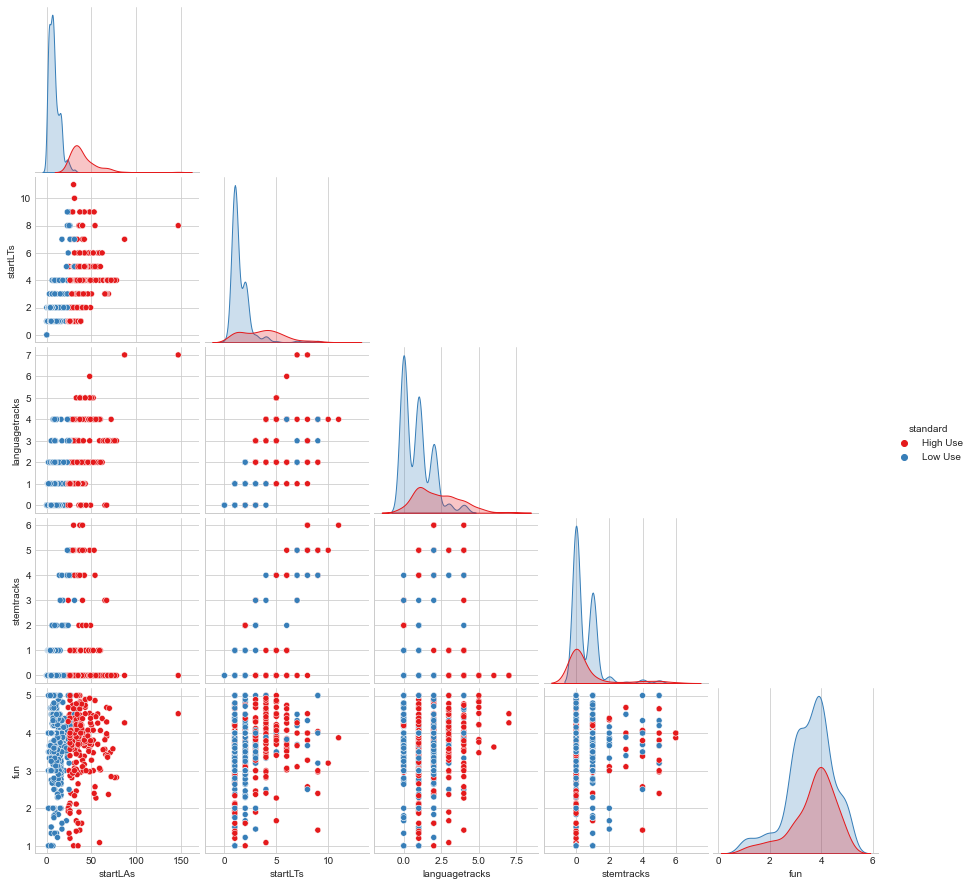

In [29]:
testc = test.copy()
testc['standard'].replace({1: 'High Use', 0: 'Low Use'}, inplace = True)
v = sns.pairplot(testc, hue = 'standard', vars = ['startLAs', 'startLTs', 'languagetracks', 'stemtracks', 'fun'], corner = True, palette = 'Set1')

In [30]:
compares = test[test['primary'] == 0].describe() - test[test['primary'] == 1].describe()
compares

,school_id,startLAs,completeLAs,ratio,exercises,engages,coms,vids,games,fls,unifls,startLTs,completeLTs,languagetracks,stemtracks,musictracks,religiontracks,prob,diff,fun,standard,primary
count,-347.000000,-347.000000,-347.000000,-342.000000,-347.000000,-347.000000,-347.000000,-347.000000,-347.000000,-347.000000,-347.000000,-347.000000,-347.000000,-347.000000,-347.000000,-347.000000,-347.000000,-347.000000,-397.0,-207.000000,-347.000000,-347.0
mean,-4.669047,21.894752,19.750069,-0.166156,13.390664,4.685965,0.256285,3.177521,0.384317,-0.149031,-0.104798,2.738002,0.916552,1.543844,0.346072,0.605263,-0.001739,0.462281,NaN,0.446664,0.562319,-1.0
std,-4.129001,9.299580,9.247998,-0.217538,7.769598,1.019025,-0.994182,1.705300,0.108786,-0.687306,-0.461418,1.540848,0.698129,0.630948,1.066924,0.557186,-0.041703,0.705147,NaN,-0.255227,0.166464,0.0
min,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,0.085106,0.000000,-1.0
25%,1.000000,18.000000,9.750000,0.024353,6.000000,4.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,NaN,0.575758,0.000000,-1.0
50%,-5.000000,26.000000,23.500000,-0.100000,16.000000,6.000000,1.000000,3.000000,1.000000,0.000000,0.000000,3.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,NaN,0.415443,1.000000,-1.0
75%,-7.000000,30.000000,27.250000,-0.349696,18.000000,7.000000,-0.750000,5.000000,1.000000,0.000000,0.000000,3.000000,1.000000,2.000000,-1.000000,1.000000,0.000000,1.000000,NaN,0.357143,1.000000,-1.0
max,-23.000000,60.000000,60.000000,-0.857143,48.000000,-3.000000,-16.000000,4.000000,0.000000,-9.000000,-6.000000,4.000000,2.000000,0.000000,3.000000,2.000000,-1.000000,-10.000000,NaN,0.000000,0.000000,-1.0


In [32]:
a, b, c = ttest_ind(test[(test['primary'] == 0)], test[test['primary'] == 1])
pd.DataFrame([a, b], columns = test.columns)

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\stats\weightstats.py:650: RuntimeWarning: divide by zero encountered in true_divide
  tstat = (value1 - value2 - diff) / std_diff


,school_id,startLAs,completeLAs,ratio,exercises,engages,coms,vids,games,fls,unifls,startLTs,completeLTs,languagetracks,stemtracks,musictracks,religiontracks,prob,diff,fun,standard,primary
0,-1.138177e+01,2.054032e+01,1.826572e+01,NaN,1.850512e+01,1.618871e+01,1.53142,2.247729e+01,1.050608e+01,-2.103106,-2.108677,2.780097e+01,1.236502e+01,1.879967e+01,4.315073,2.607297e+01,-0.629463,3.999629,NaN,NaN,1.990124e+01,-inf
1,6.315876e-28,1.213681e-75,1.409820e-62,NaN,6.323979e-64,3.299815e-51,0.12606,3.931117e-87,2.819464e-24,0.035768,0.035282,1.318308e-119,2.882935e-32,1.357576e-65,0.000018,5.488102e-109,0.529226,0.000069,NaN,NaN,6.435230e-72,0.0


In [33]:
ttest_ind(test[(test['primary'] == 0) & (test['ratio'].notna())]['ratio'], test[(test['primary'] == 1) & (test['ratio'].notna())]['ratio'])

(-5.379004079849564, 9.8674281885049e-08, 792.0)

In [34]:
ttest_ind(test[(test['primary'] == 0) & (test['fun'].notna())]['fun'], test[(test['primary'] == 1) & (test['fun'].notna())]['fun'])

(6.22407589246859, 8.833239034686204e-10, 631.0)

Teacher Analyses
---

In [35]:
teachtable = pd.read_csv('teachertable.csv')
teachtable.describe()

,school_id,Number of Learning Tracks Added to Library,Number of Learning Tracks Edited,Number of Groups Created,Number of Edits to Groups,Total Learning Tracks Assigned to Groups,Assigned LTs per Group Created
count,80.000000,80.000000,80.000000,80.000000,80.000000,80.00000,41.000000
mean,12.487500,4.487500,0.450000,2.000000,3.212500,2.80000,1.815809
std,8.725046,7.165306,1.439937,3.166278,6.261584,5.11983,2.756344
min,4.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000
25%,7.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.400000
50%,10.000000,1.500000,0.000000,1.000000,0.000000,0.00000,1.000000
75%,13.000000,6.000000,0.000000,3.000000,5.000000,4.00000,2.500000
max,41.000000,38.000000,11.000000,14.000000,38.000000,25.00000,17.000000


In [36]:
useteach = teachtable[((teachtable['Number of Learning Tracks Added to Library'] > 0) | (teachtable['Number of Learning Tracks Edited'] > 0)|
                 (teachtable['Number of Groups Created'] > 0) | (teachtable['Number of Edits to Groups'] > 0) | 
                 (teachtable['Total Learning Tracks Assigned to Groups'] > 0))].copy()
useteach.reset_index(drop = True, inplace = True)

In [37]:
useteach.describe()

,school_id,Number of Learning Tracks Added to Library,Number of Learning Tracks Edited,Number of Groups Created,Number of Edits to Groups,Total Learning Tracks Assigned to Groups,Assigned LTs per Group Created
count,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,41.000000
mean,10.933333,7.977778,0.800000,3.555556,5.711111,4.977778,1.815809
std,5.516092,7.981481,1.853743,3.513322,7.470007,5.998064,2.756344
min,4.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,7.000000,2.000000,0.000000,1.000000,1.000000,0.000000,0.400000
50%,10.000000,5.000000,0.000000,3.000000,3.000000,3.000000,1.000000
75%,13.000000,12.000000,1.000000,4.000000,8.000000,7.000000,2.500000
max,33.000000,38.000000,11.000000,14.000000,38.000000,25.000000,17.000000


In [39]:
teachclus = useteach.drop(columns = ['id', 'school_id'])
teachclus['Assigned LTs per Group Created'] = teachclus['Assigned LTs per Group Created'].fillna(-1)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


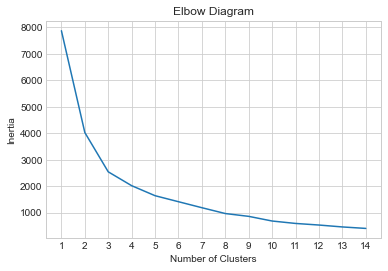

In [40]:
ilf.elbowsseDiagram(teachclus, 15)

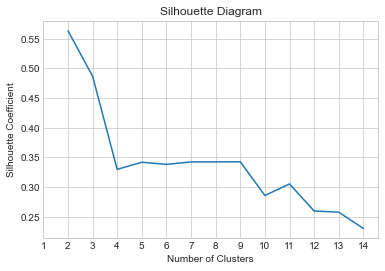

In [41]:
ilf.silDiagram(teachclus,15)

In [42]:
smeans = KMeans(n_clusters = 2, random_state = 6)
smeans.fit(teachclus)
stlabels = smeans.labels_

useteach['Standard Labels'] = pd.DataFrame(stlabels)

In [43]:
useteach[useteach['Standard Labels']==0].describe()

,school_id,Number of Learning Tracks Added to Library,Number of Learning Tracks Edited,Number of Groups Created,Number of Edits to Groups,Total Learning Tracks Assigned to Groups,Assigned LTs per Group Created,Standard Labels
count,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.0
mean,7.285714,22.142857,1.000000,9.857143,17.285714,14.428571,1.739874,0.0
std,2.497618,8.194075,0.816497,3.716117,11.643514,7.412987,1.167901,0.0
min,4.000000,13.000000,0.000000,4.000000,7.000000,6.000000,0.461538,0.0
25%,5.500000,17.000000,0.500000,7.500000,10.500000,9.500000,0.923077,0.0
50%,8.000000,21.000000,1.000000,10.000000,13.000000,13.000000,1.300000,0.0
75%,9.000000,24.500000,1.500000,13.000000,21.000000,19.000000,2.500000,0.0
max,10.000000,38.000000,2.000000,14.000000,38.000000,25.000000,3.571429,0.0


In [44]:
useteach[useteach['Standard Labels']==1].describe()

,school_id,Number of Learning Tracks Added to Library,Number of Learning Tracks Edited,Number of Groups Created,Number of Edits to Groups,Total Learning Tracks Assigned to Groups,Assigned LTs per Group Created,Standard Labels
count,38.000000,38.000000,38.000000,38.000000,38.000000,38.000000,34.000000,38.0
mean,11.605263,5.368421,0.763158,2.394737,3.578947,3.236842,1.831443,1.0
std,5.673740,4.462583,1.992340,1.882199,3.789256,3.723078,2.993249,0.0
min,5.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0
25%,7.000000,2.000000,0.000000,1.000000,0.250000,0.000000,0.258929,1.0
50%,11.000000,4.000000,0.000000,2.000000,2.500000,2.000000,1.000000,1.0
75%,16.000000,7.750000,1.000000,3.000000,6.000000,5.000000,2.437500,1.0
max,33.000000,20.000000,11.000000,8.000000,14.000000,17.000000,17.000000,1.0


In [45]:
readteachcols = {'Number of Learning Tracks Added to Library': 'LTadd', 'Number of Learning Tracks Edited': 'LTedit', 'Number of Groups Created': 'groupcreate',
                 'Number of Edits to Groups': 'groupedit', 'Total Learning Tracks Assigned to Groups': 'LTassigngroup',
                 'Assigned LTs per Group Created': 'ratioLTassign', 'Robust Labels': 'robust', 'Standard Labels': 'standard'}

readteach = useteach.rename(columns = readteachcols)
readteach.drop(columns = 'id', inplace = True)
readteach['notprimary'] = np.where(readteach['school_id'].isin([4, 7, 8, 9, 10]), 0, 1)

In [46]:
teachcomp = MANOVA.from_formula('LTadd + LTedit + groupcreate + groupedit + LTassigngroup + ratioLTassign~ C(standard) + C(notprimary)', data = readteach)

print(teachcomp.mv_test())

                 Multivariate linear model
                                                            
------------------------------------------------------------
       Intercept        Value  Num DF  Den DF F Value Pr > F
------------------------------------------------------------
          Wilks' lambda 0.1093 6.0000 33.0000 44.8243 0.0000
         Pillai's trace 0.8907 6.0000 33.0000 44.8243 0.0000
 Hotelling-Lawley trace 8.1499 6.0000 33.0000 44.8243 0.0000
    Roy's greatest root 8.1499 6.0000 33.0000 44.8243 0.0000
------------------------------------------------------------
                                                            
------------------------------------------------------------
      C(standard)       Value  Num DF  Den DF F Value Pr > F
------------------------------------------------------------
          Wilks' lambda 0.2632 6.0000 33.0000 15.3951 0.0000
         Pillai's trace 0.7368 6.0000 33.0000 15.3951 0.0000
 Hotelling-Lawley trace 2.7991 6.0000 33.0

In [47]:
a, b,c = ttest_ind(readteach[(readteach['standard'] == 0)], readteach[readteach['standard'] == 1])
pd.DataFrame([a, b], columns = readteach.columns)

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\stats\weightstats.py:650: RuntimeWarning: divide by zero encountered in true_divide
  tstat = (value1 - value2 - diff) / std_diff


,school_id,LTadd,LTedit,groupcreate,groupedit,LTassigngroup,ratioLTassign,standard,notprimary
0,-1.96480,7.921758e+00,0.307417,8.134028e+00,5.959262e+00,6.146951e+00,NaN,-inf,-4.327689
1,0.05592,6.120508e-10,0.760010,3.064377e-10,4.190767e-07,2.234904e-07,NaN,0.0,0.000088


In [48]:
ttest_ind(readteach[(readteach['standard'] == 0) & (readteach['ratioLTassign'].notna())]['ratioLTassign'], readteach[(readteach['standard'] == 1) & (readteach['ratioLTassign'].notna())]['ratioLTassign'])

(-0.07903959217646675, 0.9374053014604876, 39.0)

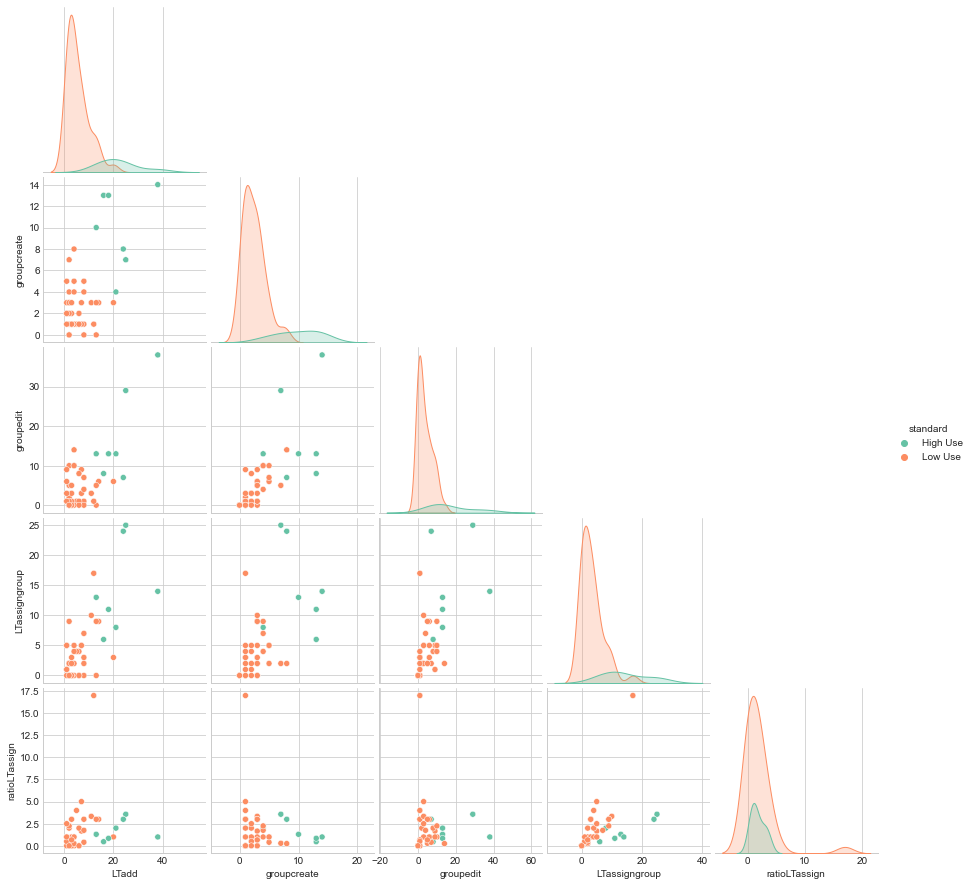

In [49]:
readteachc = readteach.copy()
readteachc['standard'].replace({0: 'High Use', 1: 'Low Use'}, inplace = True)
teachfig = sns.pairplot(readteachc, hue = 'standard', vars = ['LTadd', 'groupcreate', 'groupedit', 'LTassigngroup', 'ratioLTassign'], palette = 'Set2', corner = True)

In [51]:
ltcluster = pd.read_csv('LTCluster.csv')
ltcluster

,_id,id,learningTrackCluster_id,Number of Learning Activities in LT,Number of Exercises in LT,Number of Engagement Activities in LT,Number of Communication Activities in LT,Number of Videos in LT,Number of Games in LT,Times Edited,Average Fun of LT,Average Difficulty of LT,typeLT,highuseteachLT,notprimary
0,30,f9bd6de1-3d80-4999-99e7-284e8a857fd7,15,3.0,0,3,1,0,0,0,NaN,NaN,1,0,0
1,3,fc6af83c-46b9-44fd-b7b4-80c551d5dcd4,3,3.0,1,0,3,0,0,0,NaN,NaN,1,0,1
2,121,c9dcb628-39ab-437e-a4de-861d42bcbf8c,2,22.0,11,5,0,7,0,0,NaN,NaN,1,0,1
3,485,0572b950-c9f8-4434-b96c-d8323ec7ea28,8,10.0,8,0,2,0,1,0,NaN,NaN,2,0,1
4,111,0915b877-8a50-4f65-81d5-79e34b4d3c83,2,1.0,0,0,0,2,0,1,NaN,NaN,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
964,926,e38f397e-6164-4d58-acbc-795ba2d25587,15,29.0,17,4,0,1,0,0,3.352941,NaN,1,1,0
965,927,b2d39816-5043-46a4-8836-b79e028442a4,15,26.0,16,4,0,1,0,0,2.968254,NaN,1,1,0
966,718,87e82fcd-bcaf-4bf4-bd0e-90ceddc247b8,15,0.0,0,1,0,0,0,0,NaN,NaN,1,1,0
967,923,f9a63bce-b136-4c8a-9a0b-415f97c6d19c,15,36.0,19,6,1,2,0,0,NaN,NaN,1,1,0


In [52]:
ltcluster.describe()

,_id,learningTrackCluster_id,Number of Learning Activities in LT,Number of Exercises in LT,Number of Engagement Activities in LT,Number of Communication Activities in LT,Number of Videos in LT,Number of Games in LT,Times Edited,Average Fun of LT,Average Difficulty of LT,typeLT,highuseteachLT,notprimary
count,969.000000,969.000000,966.000000,969.000000,969.000000,969.000000,969.000000,969.000000,969.000000,259.000000,162.000000,969.000000,969.000000,969.000000
mean,485.000000,12.496388,14.379917,8.744066,2.300310,1.782250,1.277606,0.163055,0.277606,3.552332,2.502659,1.232198,0.159959,0.398349
std,279.870506,5.193790,12.057185,7.069645,3.235522,3.004998,1.296182,0.377898,1.013506,0.742205,0.759280,0.990010,0.366757,0.489811
min,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000
25%,243.000000,8.000000,4.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000,2.000000,1.000000,0.000000,0.000000
50%,485.000000,14.000000,10.000000,8.000000,1.000000,1.000000,1.000000,0.000000,0.000000,3.666667,2.427736,1.000000,0.000000,0.000000
75%,727.000000,18.000000,26.000000,15.000000,3.000000,2.000000,2.000000,0.000000,0.000000,4.000000,3.000000,2.000000,0.000000,1.000000
max,969.000000,19.000000,40.000000,36.000000,15.000000,21.000000,9.000000,2.000000,14.000000,5.000000,5.000000,4.000000,1.000000,1.000000


In [53]:
readableltcols = {'Average Fun of LT': 'funLT', 'Times Edited': 'edit', 'Average Difficulty of LT': 'diffLT', 'Number of Learning Activities in LT': 'lenLT',
                 'Number of Exercises in LT': 'exerciseLT', 'Number of Engagement Activities in LT': 'engageLT', 'Number of Communication Activities in LT': 'comLT', 
                 'Number of Videos in LT': 'vidLT', 'Number of Games in LT': 'gameLT'}

In [54]:
readlt = ltcluster.rename(columns = readableltcols)

In [55]:
ttest_ind(readlt[(readlt['highuseteachLT'] == 1) & (readlt['funLT'].notna())]['funLT'], readlt[(readlt['highuseteachLT'] == 0) & (readlt['funLT'].notna())]['funLT'])

(4.120190597152202, 5.1094851637441756e-05, 257.0)

In [56]:
ttest_ind(readlt[(readlt['highuseteachLT'] == 1)]['typeLT'], readlt[(readlt['highuseteachLT'] == 0)]['typeLT'])

(1.063140980546951, 0.2879834387566984, 967.0)

In [57]:
ttest_ind(readlt[(readlt['highuseteachLT'] == 1)]['lenLT'], readlt[(readlt['highuseteachLT'] == 0) & (readlt['lenLT'].notna())]['lenLT'])

(1.2735741828715954, 0.2031213592016689, 964.0)

In [58]:
ttest_ind(readlt[(readlt['notprimary'] == 0)]['lenLT'], readlt[(readlt['notprimary'] == 1) & (readlt['lenLT'].notna())]['lenLT'])

(-5.982942850884326, 3.085941608824446e-09, 964.0)

In [59]:
ttest_ind(readlt[(readlt['notprimary'] == 0)]['comLT'], readlt[(readlt['notprimary'] == 1)]['comLT'])

(-13.831976908570399, 7.759837275422592e-40, 967.0)

In [60]:
ttest_ind(readlt[(readlt['notprimary'] == 0) & (readlt['funLT'].notna())]['funLT'], readlt[(readlt['notprimary'] == 1) & (readlt['funLT'].notna())]['funLT'])

(4.4789203587965725, 1.129433111583974e-05, 257.0)